In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
device = 'cpu'

In [ ]:
batch_size = 100

transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
indices = [idx for idx, target in enumerate(trainset.targets) if target in [0]]
trainsetclass0 = torch.utils.data.Subset(trainset, indices)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset),shuffle=True, num_workers=2)

l_train = len(trainsetclass0)

validationsetclass0, trainsetclass0 = random_split(trainsetclass0, [int(l_train*0.2), int(l_train*0.8)])

trainloader = torch.utils.data.DataLoader(trainsetclass0, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
validationloader = torch.utils.data.DataLoader(validationsetclass0, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


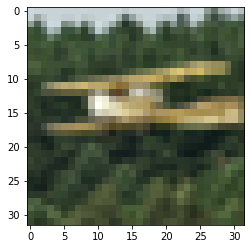

In [ ]:
#sample training image
plt.imshow(np.transpose(trainsetclass0[0][0], (1, 2, 0))) 

## __Convolutional Autoencoder__

In [ ]:
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()
        
        self.Encoder = nn.Sequential(
            nn.Conv2d(3, 12, 4, stride=2, padding=1),    
            nn.ReLU(),
            nn.Conv2d(12, 24, 4, stride=2, padding=1),  
            nn.ReLU(),
		      	nn.Conv2d(24, 48, 4, stride=2, padding=1),  
            nn.ReLU(),)
        self.Decoder = nn.Sequential(
			      nn.ConvTranspose2d(48, 24, 4, stride=2, padding=1), 
            nn.ReLU(),
			      nn.ConvTranspose2d(24, 12, 4, stride=2, padding=1),  
            nn.ReLU(),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            nn.Sigmoid(),)

    def forward(self, x):
        x = self.Encoder(x)
        x = self.Decoder(x)
        return x

In [ ]:
# Train Neural Network
import tqdm
torch.manual_seed(123)
num_epochs = [10]
lr_list = [0.1,0.01, 0.001]
wd_list = [0.01, 0.001, 0.0001]
criterion  = nn.MSELoss()

for lr in lr_list:
  for weight_decay in wd_list:
    for epochs in num_epochs:

      ConvAE_model = ConvAutoEncoder()
      save_training_loss = []
      save_validation_loss = []
      
      tqdm_epoch = tqdm.trange(epochs)
      for epoch in tqdm_epoch:
            optConvAE = optim.Adam(ConvAE_model.parameters(), lr= lr, weight_decay= weight_decay)
            training_loss_ConvAE = 0 
            
            # Training Set
            for batch_ind, (image,_) in enumerate(trainloader):
                
                #image = image.to(device)
                
                # ConvAE model
                optConvAE.zero_grad()
                out_ConvAE = ConvAE_model(image)
                loss_ConvAE = criterion(image, out_ConvAE)
                loss_ConvAE.backward()
                optConvAE.step()
                training_loss_ConvAE += loss_ConvAE.item()

            # Save Training Loss    
            save_training_loss.append(training_loss_ConvAE)
            validation_loss_ConvAE = 0.0  

            # Validation Set
            for batch_ind, (image,_) in enumerate(validationloader):

                # ConvAE model
                out_ConvAE = ConvAE_model(image)
                loss_ConvAE = criterion(image, out_ConvAE)
                validation_loss_ConvAE += loss_ConvAE.item()
     
            save_validation_loss.append(validation_loss_ConvAE)
      average_training_loss = np.mean(save_training_loss)
      average_validation_loss = np.mean(save_validation_loss)
      print(f"Learning Rate: {lr}")
      print(f"Weight Decay: {weight_decay}")
      print(f"Number of Epochs: {epochs}")
      print(f"Avg. Training Loss: {average_training_loss}")   
      print(f"Avg. Validation Loss: {average_validation_loss}") 
      PATH = './anomaly_model_'+str(lr)+'_'+str(weight_decay)+'_'+str(epochs)+'_'+'.pth'
      torch.save(ConvAE_model, PATH)
      print('\n')            

100%|██████████| 1/1 [00:11<00:00, 11.75s/it]


Learning Rate: 0.1
Weight Decay: 0.01
Number of Epochs: 1
Avg. Training Loss: 2.5677952356636524
Avg. Validation Loss: 0.6422575302422047




100%|██████████| 1/1 [00:11<00:00, 11.45s/it]


Learning Rate: 0.1
Weight Decay: 0.001
Number of Epochs: 1
Avg. Training Loss: 3.329200714826584
Avg. Validation Loss: 0.7820576727390289




100%|██████████| 1/1 [00:11<00:00, 11.46s/it]


Learning Rate: 0.1
Weight Decay: 0.0001
Number of Epochs: 1
Avg. Training Loss: 3.5787676572799683
Avg. Validation Loss: 0.642495896667242




100%|██████████| 1/1 [00:11<00:00, 11.55s/it]


Learning Rate: 0.01
Weight Decay: 0.01
Number of Epochs: 1
Avg. Training Loss: 2.5962232500314713
Avg. Validation Loss: 0.641188882291317




100%|██████████| 1/1 [00:11<00:00, 11.44s/it]


Learning Rate: 0.01
Weight Decay: 0.001
Number of Epochs: 1
Avg. Training Loss: 2.5862519294023514
Avg. Validation Loss: 0.6410000026226044




100%|██████████| 1/1 [00:11<00:00, 11.39s/it]


Learning Rate: 0.01
Weight Decay: 0.0001
Number of Epochs: 1
Avg. Training Loss: 2.379073552787304
Avg. Validation Loss: 0.4474903270602226




100%|██████████| 1/1 [00:11<00:00, 11.35s/it]


Learning Rate: 0.001
Weight Decay: 0.01
Number of Epochs: 1
Avg. Training Loss: 2.7326233461499214
Avg. Validation Loss: 0.6703213751316071




100%|██████████| 1/1 [00:11<00:00, 11.45s/it]


Learning Rate: 0.001
Weight Decay: 0.001
Number of Epochs: 1
Avg. Training Loss: 2.660664938390255
Avg. Validation Loss: 0.6492626592516899




100%|██████████| 1/1 [00:11<00:00, 11.34s/it]

Learning Rate: 0.001
Weight Decay: 0.0001
Number of Epochs: 1
Avg. Training Loss: 2.450981952250004
Avg. Validation Loss: 0.49163009598851204




In [ ]:
# Neural Network with optimal parameters
PATH_optimal_model = './anomaly_model_'+str(0.001)+'_'+str(0.0001)+'_'+str(1)+'_'+'.pth'
optConvAE = torch.load(PATH)


In [ ]:
# Define a function to plot both training and validation loss
def plot_loss(training_loss, validation_loss):
    fig = plt.figure(figsize=(12,8)) 
    plt.plot(training_loss, color = "red", linewidth=3, label = 'Training Loss')
    plt.plot(validation_loss, color = "green", linewidth=3, label = 'Validation Loss')
    plt.xlabel("Epoch Number", fontsize = 12)
    plt.ylabel("Loss", fontsize = 14) 
    plt.title("Neural Network Loss by Epoch", fontsize = 16, fontweight = "bold")
    #plt.xticks(np.arange(0, 22, 2))
    plt.legend(fontsize = 12)
    plt.grid()
    plt.show()

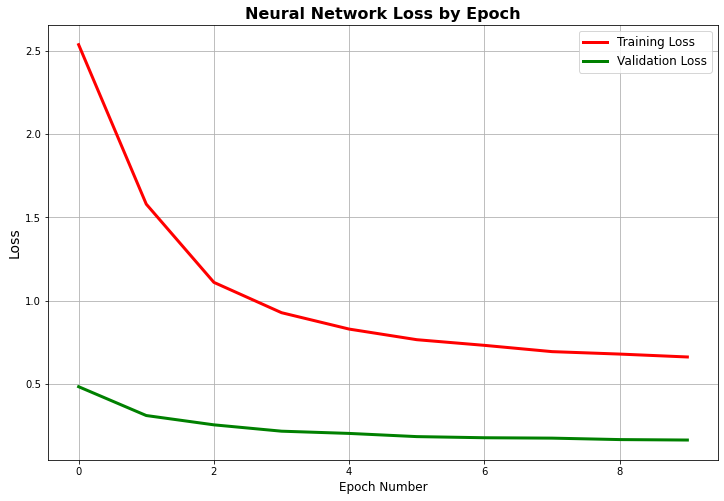

In [ ]:
plot_loss(save_training_loss, save_validation_loss)

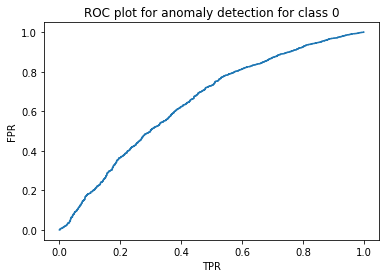

The AUC is  0.3515691111111111


In [ ]:
for batch_ind, (image,target) in enumerate(testloader):
    ConvAE_model.eval()
    with torch.no_grad():
        reconstructed_image = ConvAE_model(image)
test_mse = torch.mean((image.view(10000,-1)-reconstructed_image.view(10000,-1))**2,dim=1)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(target, test_mse, pos_label=0)
plt.plot(tpr,fpr)
plt.title("ROC plot for anomaly detection for class 0")
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.show()
print("The AUC is ",metrics.auc(fpr, tpr))


In [ ]:
diff_image = torch.abs(image[5:7]-reconstructed_image[5:7])

In [ ]:
target[5:7]

tensor([2, 0])

In [ ]:
diff_image.size()

torch.Size([2, 3, 32, 32])

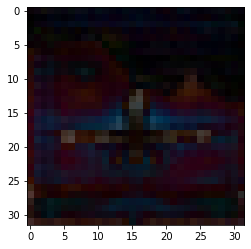

In [ ]:
plt.imshow(np.transpose(diff_image[1], (1, 2, 0))) 

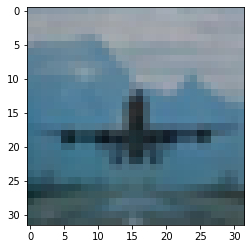

In [ ]:
plt.imshow(np.transpose(image[5:7][1], (1, 2, 0))) 

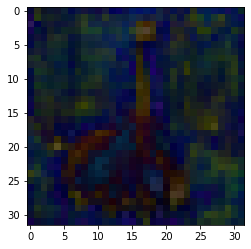

In [ ]:
plt.imshow(np.transpose(diff_image[0], (1, 2, 0))) 


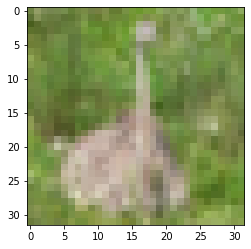

In [ ]:
plt.imshow(np.transpose(image[5:7][0], (1, 2, 0))) 

In [ ]:
diff_image = torch.mean(torch.abs(image[5:7]-reconstructed_image[5:7]),dim=1,keepdim=True)

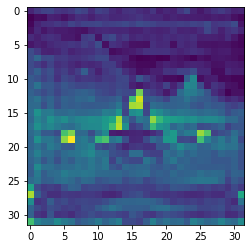

In [ ]:
plt.imshow(np.transpose(diff_image[1], (1, 2, 0))) 

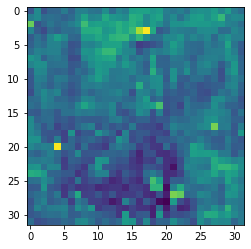

In [ ]:
plt.imshow(np.transpose(diff_image[0], (1, 2, 0))) 